# KITTIMonoDataset

In [1]:
import albumentations
print(albumentations.__version__)
from model_loader import *
from model_utility import *
from torch.utils.data import DataLoader

batch_size = 32
frame_ids  = [0, -1, 1]

datatype   = ["kitti_benchmark", "kitti_eigen_full", "kitti_eigen_zhou"]
datapath   = "./dataset/kitti"
filepath   = os.path.join("./splits", "kitti_eigen_zhou", "{}_files.txt")


train_filename = readlines(filepath.format("train"))
valid_filename = readlines(filepath.format("val"))
print(len(train_filename))
print(len(valid_filename))


dataset = KITTIMonoDataset(datapath, train_filename, False, frame_ids, ".jpg", 192, 640, 4)
loader  = DataLoader(dataset, batch_size, shuffle = False, drop_last = True)
sample  = tools.sample_dataset(loader, 0)


for key in sample[0]:
    print(key, sample[0][key].shape, sample[0][key].dtype)

1.0.2


0it [00:00, ?it/s]

39810
4424
>>>  KITTI scaling table
>>>  Interpolation     :  3
>>>  Is training???    :  False
>>>  Resolution List   :  [(192, 640), (96, 320), (48, 160), (24, 80)]


0it [00:02, ?it/s]

batch sampling time:   2.072455644607544
('color', 0, 0) torch.Size([32, 3, 192, 640]) torch.float32
('color', 0, 1) torch.Size([32, 3, 96, 320]) torch.float32
('color', 0, 2) torch.Size([32, 3, 48, 160]) torch.float32
('color', 0, 3) torch.Size([32, 3, 24, 80]) torch.float32
('color', -1, 0) torch.Size([32, 3, 192, 640]) torch.float32
('color', -1, 1) torch.Size([32, 3, 96, 320]) torch.float32
('color', -1, 2) torch.Size([32, 3, 48, 160]) torch.float32
('color', -1, 3) torch.Size([32, 3, 24, 80]) torch.float32
('color', 1, 0) torch.Size([32, 3, 192, 640]) torch.float32
('color', 1, 1) torch.Size([32, 3, 96, 320]) torch.float32
('color', 1, 2) torch.Size([32, 3, 48, 160]) torch.float32
('color', 1, 3) torch.Size([32, 3, 24, 80]) torch.float32
('color_aug', 0, 0) torch.Size([32, 3, 192, 640]) torch.float32
('color_aug', 0, 1) torch.Size([32, 3, 96, 320]) torch.float32
('color_aug', 0, 2) torch.Size([32, 3, 48, 160]) torch.float32
('color_aug', 0, 3) torch.Size([32, 3, 24, 80]) torch.flo

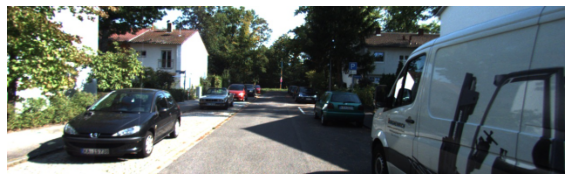

In [4]:
for ids in frame_ids:
    tools.show_image(sample[0][("color_aug", ids, 0)][0])